# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [40]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [42]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [43]:
# #api trial run to learn to navigate api
# url = f'https://api.openweathermap.org/data/2.5/weather?q=port-aux-francais&units=imperial&appid={weather_api_key}'
# response = requests.get(url).json()
# response.keys()

In [44]:
# Set the API base URL
#using the current weather API and requesting by city name
#required params are q aka city name and appid or api key

url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city.replace(' ', '+')}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | cidreira
Processing Record 3 of Set 1 | lycksele
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | nova sintra
Processing Record 6 of Set 1 | luanda
Processing Record 7 of Set 1 | port macquarie
Processing Record 8 of Set 1 | flin flon
Processing Record 9 of Set 1 | mejit
Processing Record 10 of Set 1 | zaozersk
Processing Record 11 of Set 1 | aasiaat
Processing Record 12 of Set 1 | el nido
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | dali
Processing Record 18 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | prince albert
Processing Record 21 of Set 1 | at-bashi
Processing Record 

Processing Record 38 of Set 4 | zouerate
Processing Record 39 of Set 4 | raja
Processing Record 40 of Set 4 | margate
Processing Record 41 of Set 4 | nguigmi
Processing Record 42 of Set 4 | san pedro pochutla
Processing Record 43 of Set 4 | manuel ojinaga
City not found. Skipping...
Processing Record 44 of Set 4 | rio gallegos
Processing Record 45 of Set 4 | luderitz
Processing Record 46 of Set 4 | lihue
Processing Record 47 of Set 4 | egilsstadir
Processing Record 48 of Set 4 | ixmiquilpan
Processing Record 49 of Set 4 | grand falls-windsor
Processing Record 0 of Set 5 | tolanaro
Processing Record 1 of Set 5 | coyhaique
Processing Record 2 of Set 5 | san jose village
City not found. Skipping...
Processing Record 3 of Set 5 | talnakh
Processing Record 4 of Set 5 | flying fish cove
Processing Record 5 of Set 5 | al jahra'
Processing Record 6 of Set 5 | hermanus
Processing Record 7 of Set 5 | hithadhoo
Processing Record 8 of Set 5 | coxim
Processing Record 9 of Set 5 | madalena
Processin

Processing Record 28 of Set 8 | antsiranana
Processing Record 29 of Set 8 | greenwood
Processing Record 30 of Set 8 | izhevsk
Processing Record 31 of Set 8 | mirny
Processing Record 32 of Set 8 | suva
Processing Record 33 of Set 8 | aguilares
Processing Record 34 of Set 8 | horta
Processing Record 35 of Set 8 | plastun
Processing Record 36 of Set 8 | sucua
Processing Record 37 of Set 8 | brookings
Processing Record 38 of Set 8 | lompoc
Processing Record 39 of Set 8 | el granada
Processing Record 40 of Set 8 | half moon bay
Processing Record 41 of Set 8 | bohain-en-vermandois
Processing Record 42 of Set 8 | kodinsk
Processing Record 43 of Set 8 | anqing
Processing Record 44 of Set 8 | tsiombe
Processing Record 45 of Set 8 | konarka
Processing Record 46 of Set 8 | burang
Processing Record 47 of Set 8 | tsuyama
Processing Record 48 of Set 8 | pandan
Processing Record 49 of Set 8 | vila do maio
Processing Record 0 of Set 9 | cabo san lucas
Processing Record 1 of Set 9 | kourou
Processing R

Processing Record 21 of Set 12 | santa ana
Processing Record 22 of Set 12 | altai
Processing Record 23 of Set 12 | dire
Processing Record 24 of Set 12 | gobabis
Processing Record 25 of Set 12 | ballina
Processing Record 26 of Set 12 | si chiang mai
Processing Record 27 of Set 12 | fort st. john
Processing Record 28 of Set 12 | vila velha
Processing Record 29 of Set 12 | badiyah
Processing Record 30 of Set 12 | gladenbach
Processing Record 31 of Set 12 | cargados carajos
City not found. Skipping...
Processing Record 32 of Set 12 | al bardiyah
Processing Record 33 of Set 12 | broome
Processing Record 34 of Set 12 | zakynthos
Processing Record 35 of Set 12 | faya-largeau
Processing Record 36 of Set 12 | kotkapura
Processing Record 37 of Set 12 | saint-joseph
Processing Record 38 of Set 12 | dzhalagash
-----------------------------
Data Retrieval Complete      
-----------------------------


In [49]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [50]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,269.60,86,100,1.47,RU,1696439051
1,cidreira,-30.1811,-50.2056,294.10,82,98,4.29,BR,1696439051
2,lycksele,64.5954,18.6735,279.50,100,100,0.00,SE,1696439052
3,ribeira grande,38.5167,-28.7000,296.37,94,40,4.92,PT,1696439052
4,nova sintra,14.8667,-24.7167,298.26,69,91,0.95,CV,1696439052


In [51]:
# Export the City_Data into a csv
city_data_df.to_csv("Output Data/cities.csv", index_label="City_ID")

In [52]:
# Read saved data

city_data_df = pd.read_csv("Output Data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,269.60,86,100,1.47,RU,1696439051
1,cidreira,-30.1811,-50.2056,294.10,82,98,4.29,BR,1696439051
2,lycksele,64.5954,18.6735,279.50,100,100,0.00,SE,1696439052
3,ribeira grande,38.5167,-28.7000,296.37,94,40,4.92,PT,1696439052
4,nova sintra,14.8667,-24.7167,298.26,69,91,0.95,CV,1696439052


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

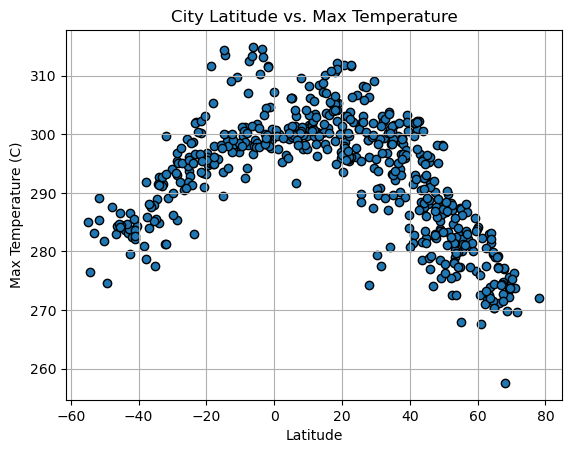

In [56]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
# Save the figure
plt.savefig("Output Data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

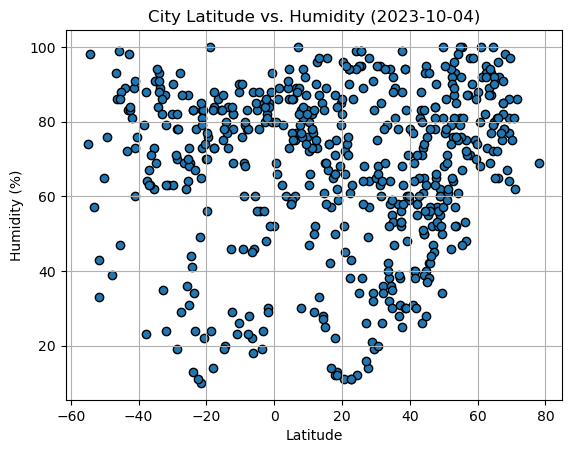

In [57]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-10-04)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("Output Data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

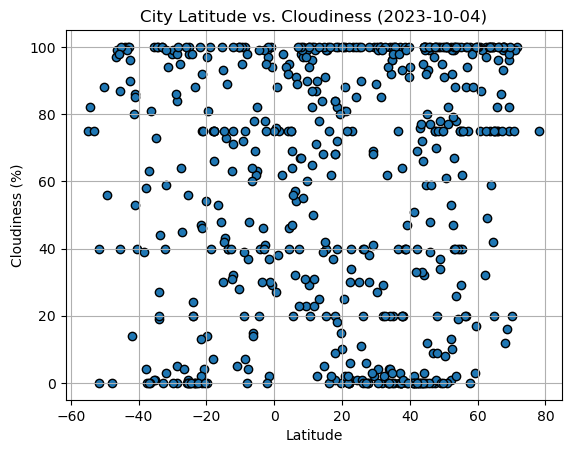

In [58]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-10-04)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("Output Data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

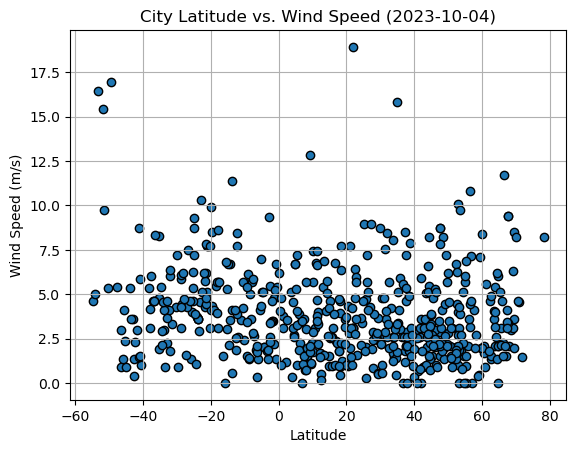

In [59]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-10-04)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
plt.savefig("Output Data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [115]:
# Define a function to create Linear Regression plots
#include arguments or varibles inside of function parenthesis
def linear_regression_plt(x_values, y_values, x_label, y_label, formula_position):
    #calculate linear regression
    (slope, y_intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    #linear regression line formula (y=mx+b)
    regression_points = x_values * slope + y_intercept
    #create a scatter plot 
    plt.scatter(x_values, y_values)
    #plot regression line
    plt.plot(x_values, regression_points, "r-", label=f'y={round(slope,2)}x + {round(y_intercept,2)}')
    
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    #write regression line formula graph
    line_formula = f'y={round(slope, 2)}x + {round(y_intercept,2)}'
    plt.annotate(line_formula, xy=formula_position, xycoords='axes fraction', fontsize = 15)
    
    #print r-value and plot scatter plot
    print(f'The r-value is: {r_value}')
    plt.show()

In [116]:
city_data_df.loc[city_data_df['Lat']>= 0]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,269.60,86,100,1.47,RU,1696439051
2,lycksele,64.5954,18.6735,279.50,100,100,0.00,SE,1696439052
3,ribeira grande,38.5167,-28.7000,296.37,94,40,4.92,PT,1696439052
4,nova sintra,14.8667,-24.7167,298.26,69,91,0.95,CV,1696439052
7,flin flon,54.7682,-101.8650,283.06,81,40,1.54,CA,1696439052
...,...,...,...,...,...,...,...,...,...
558,broome,42.2506,-75.8330,302.04,71,0,1.79,US,1696439167
559,zakynthos,37.7914,20.8953,295.73,68,20,0.00,GR,1696439167
560,faya-largeau,17.9257,19.1043,306.49,22,84,4.70,TD,1696439167


In [117]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,269.60,86,100,1.47,RU,1696439051
2,lycksele,64.5954,18.6735,279.50,100,100,0.00,SE,1696439052
3,ribeira grande,38.5167,-28.7000,296.37,94,40,4.92,PT,1696439052
4,nova sintra,14.8667,-24.7167,298.26,69,91,0.95,CV,1696439052
7,flin flon,54.7682,-101.8650,283.06,81,40,1.54,CA,1696439052


In [118]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,cidreira,-30.1811,-50.2056,294.10,82,98,4.29,BR,1696439051
5,luanda,-8.8368,13.2343,300.15,69,20,5.66,AO,1696439052
6,port macquarie,-31.4333,152.9167,289.20,63,94,3.32,AU,1696439052
12,waitangi,-43.9535,-176.5597,283.61,89,100,5.36,NZ,1696439053
14,port-aux-francais,-49.3500,70.2167,274.61,76,56,16.98,TF,1696439054


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.819910491751876


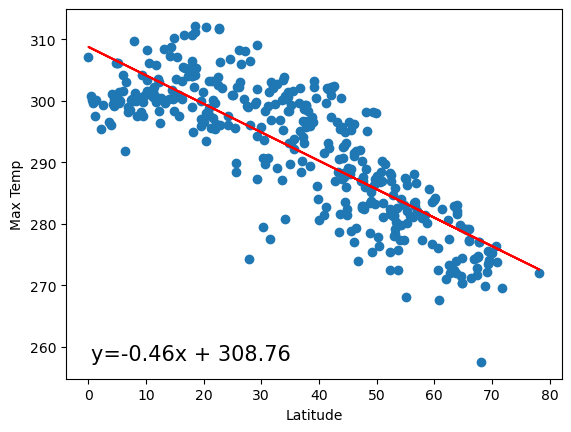

In [120]:
# Linear regression on Northern Hemisphere
linear_regression_plt(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', (0.05, 0.05))


The r-value is: 0.7995730648408851


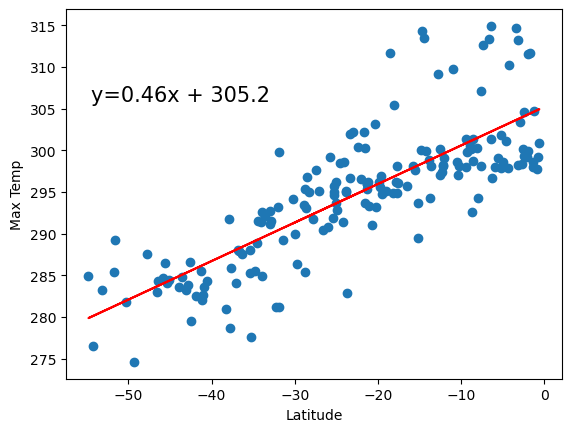

In [123]:
# Linear regression on Southern Hemisphere
linear_regression_plt(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', (0.05, 0.75))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.12852212162640578


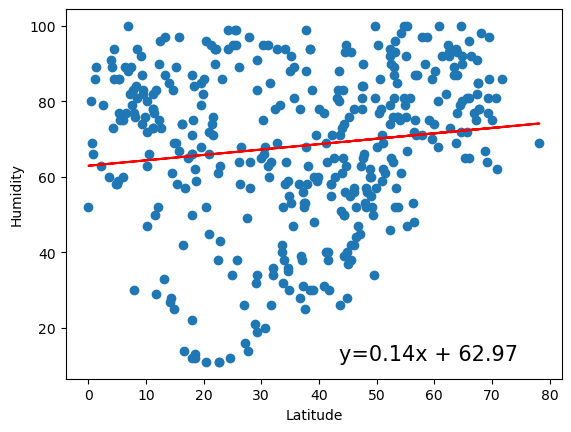

In [126]:
# Northern Hemisphere
linear_regression_plt(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity', (0.55, 0.05))

The r-value is: -0.13620951801034267


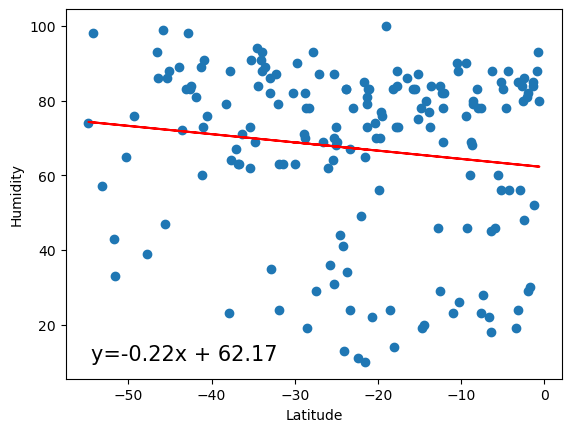

In [127]:
# Southern Hemisphere
linear_regression_plt(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity', (0.05, 0.05))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.09384631698571291


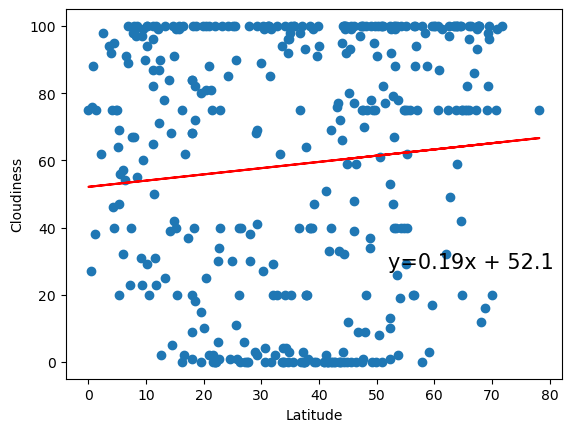

In [132]:
# Northern Hemisphere
linear_regression_plt(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', (0.65, 0.30))

The r-value is: -0.041716711176970726


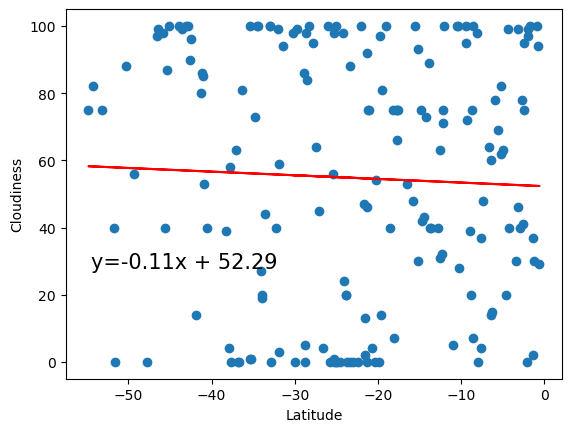

In [133]:
# Southern Hemisphere
linear_regression_plt(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', (0.05, 0.30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03578792103972055


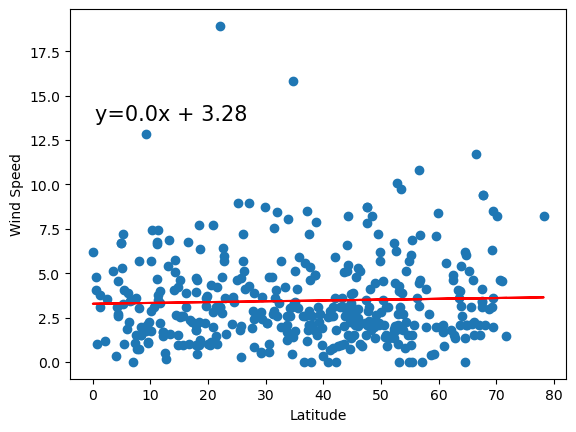

In [134]:
# Northern Hemisphere
linear_regression_plt(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', (0.05, 0.70))

The r-value is: -0.17268112226560112


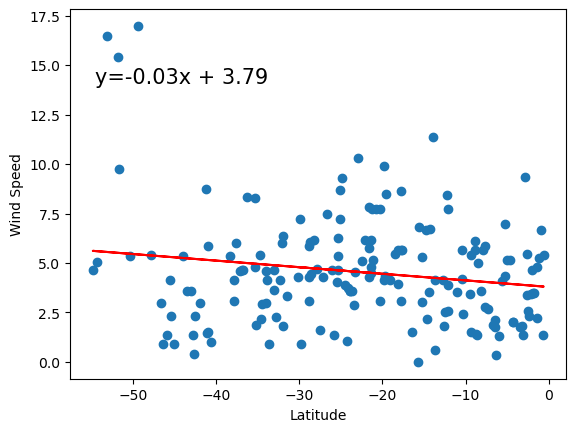

In [135]:
# Southern Hemisphere
linear_regression_plt(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', (0.05, 0.80))

**Discussion about the linear relationship:** YOUR RESPONSE HERE